# Generating a random spanning tree on the grid

To do this, we need to

1. start with one node as the tree
2. do a random walk from somewhere,
3. recording at each node I visit the last direction I took out of it, and
4. when I hit the tree, go back to the start and trace the (now, loop-erased) random walk that goes from there to the tree.
5. Add this path the tree and repeat.

In [78]:
import numpy as np
np.random.seed(23)

n = 30
m = 40
# these will be the last directions taken
xy = np.array([[(0,0) for _ in range(m)] for _ in range(n)])

# these are the unvisited locations
tree = [(0,0)]
unvisited = [(i, j) for i in range(n) for j in range(m) if (i, j) not in tree]

# possible directions
directions = [(0, +1), (0, -1), (-1, 0), (+1, 0)]

def do_lerw(start, xy, tree, n, m):
    u = start
    while u not in tree:
        options = [d for d in directions
                    if (u[0] + d[0] >= 0) and (u[0] + d[0] < n)
                      and (u[1] + d[1] >= 0) and (u[1] + d[1] < m)]
        move = options[np.random.randint(len(options))]
        xy[u] = move
        u = (u[0] + move[0], u[1] + move[1])
    u = start
    while u not in tree:
        tree.append(u)
        u = (u[0] + xy[u][0], u[1] + xy[u][1])

while len(unvisited) > 0:
    unvisited = [(i, j) for i in range(n) for j in range(m) if (i, j) not in tree]
    start = unvisited.pop()
    do_lerw(start, xy, tree, n, m)

In [30]:
import matplotlib
import matplotlib.pyplot as plt

In [32]:
# setup: has to be in a separate cell for some reason
plt.rcParams['figure.figsize'] = [8, 8]

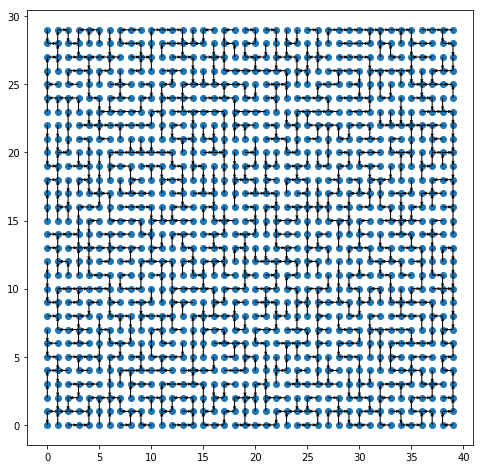

In [79]:
points = np.array([[i, j] for i in range(n) for j in range(m)])

fig, ax = plt.subplots()
ax.scatter(points[:, 1], points[:, 0])
ax.quiver(np.arange(m), np.arange(n),
          xy[:,:,1], xy[:,:,0], scale_units='xy', angles='xy', scale=1)